# Observed Trends
1) The max temperature are near the equator. When the latitude increases (towards North pole) or decreases (toward South pole), the max temperature drops. 

2) Humidity and cloudiness do not seem to be correlated to latitude as there is a relatively uniform spread across the different latitude points. 

3) The majority of cities have a wind speed under 20 mph. 

In [11]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import random
!pip install citipy
from citipy import citipy
from config import api_key
#set style for plots
plt.style.use('seaborn-talk')


# Representative Sample

In [ ]:
#Creating list of lats/lngs
lats = range(-90, 90)
lngs = range(-180, 180)
city_list = []
for lat in lats:
    for lng in lngs:
        city = citipy.nearest_city(lat, lng)
        city_name = city.city_name
        city_list.append(city_name)

# Do some cleaning (remove duplicates)
city_df = pd.DataFrame(city_list)
new_city_df = city_df.drop_duplicates()

In [3]:
#Extracting sample cities
city_samples = new_city_df.sample(750)
city_samples = city_samples.reset_index(drop = True)
city_samples.columns = ["City"]
city_samples.index += 1 
city_samples["Lat"] = ""
city_samples["Lng"] = ""
city_samples["Country"] = ""
city_samples["Date"] = ""
city_samples["Max Temp(°F) "] = ""
city_samples["Humidity(%)"] = ""
city_samples["Cloudiness(%)"] = ""
city_samples["Wind Speed(mph)"] = ""
city_samples.head()

,City,Lat,Lng,Country,Date,Max Temp(°F),Humidity(%),Cloudiness(%),Wind Speed(mph)
1,smithers,,,,,,,,
2,tirat karmel,,,,,,,,
3,igrim,,,,,,,,
4,santa rosa,,,,,,,,
5,cavalcante,,,,,,,,


# OpenWeatherMap API Weather Check

In [4]:
units = "Imperial"
print("Beginning Data Retrieval")
print("-------------------------------")
for index,row in city_samples.iterrows():
    city_name = row["City"]
    city_url_name = city_name.replace(" ", "%20")
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, api_key, city_url_name)
    city_weather = requests.get(target_url).json()
    city_samples.set_value(index,"Lat",city_weather.get("coord",{}).get("lat"))
    city_samples.set_value(index,"Lng",city_weather.get("coord",{}).get("lon"))
    city_samples.set_value(index,"Country",city_weather.get("sys",{}).get("country"))
    city_samples.set_value(index,"Date",city_weather.get("dt",{}))
    city_samples.set_value(index,"Max Temp(°F)",city_weather.get("main",{}).get("temp_max"))
    city_samples.set_value(index,"Humidity(%)",city_weather.get("main",{}).get("humidity"))
    city_samples.set_value(index,"Cloudiness(%)",city_weather.get("clouds",{}).get("all"))
    city_samples.set_value(index,"Wind Speed(mph)",city_weather.get("wind",{}).get("speed"))
    print("Processing City " + str(index) + " of 750 - " + str.title(city_name))
    print_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, "api_key", city_url_name)
    print(print_url)
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")


Beginning Data Retrieval
-------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launche

Processing City 1 of 750 - Smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=smithers
Processing City 2 of 750 - Tirat Karmel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=tirat%20karmel
Processing City 3 of 750 - Igrim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=igrim
Processing City 4 of 750 - Santa Rosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=santa%20rosa
Processing City 5 of 750 - Cavalcante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=cavalcante
Processing City 6 of 750 - Lazo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=lazo
Processing City 7 of 750 - Chodziez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=chodziez
Processing City 8 of 750 - Zlobin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=zlobin
Processing Cit

Processing City 67 of 750 - Tomelloso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=tomelloso
Processing City 68 of 750 - Nigde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=nigde
Processing City 69 of 750 - Kaili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=kaili
Processing City 70 of 750 - Mitu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=mitu
Processing City 71 of 750 - Suwalki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=suwalki
Processing City 72 of 750 - Makkaveyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=makkaveyevo
Processing City 73 of 750 - Ahar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=ahar
Processing City 74 of 750 - Nakhon Phanom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=nakhon%20phanom
Processing City 75

Processing City 133 of 750 - Shetpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=shetpe
Processing City 134 of 750 - Ust-Kalmanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=ust-kalmanka
Processing City 135 of 750 - Phalombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=phalombe
Processing City 136 of 750 - Orange
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=orange
Processing City 137 of 750 - Canmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=canmore
Processing City 138 of 750 - Frederiksvaerk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=frederiksvaerk
Processing City 139 of 750 - Gillette
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=gillette
Processing City 140 of 750 - Kem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=kem


Processing City 200 of 750 - La Peca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=la%20peca
Processing City 201 of 750 - Diofior
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=diofior
Processing City 202 of 750 - Nyamuswa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=nyamuswa
Processing City 203 of 750 - Huron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=huron
Processing City 204 of 750 - Manono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=manono
Processing City 205 of 750 - Rumoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=rumoi
Processing City 206 of 750 - Argentan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=argentan
Processing City 207 of 750 - Linchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=linchuan
Processing City 20

Processing City 266 of 750 - Coatesville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=coatesville
Processing City 267 of 750 - Bang Lamung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=bang%20lamung
Processing City 268 of 750 - Jaramana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=jaramana
Processing City 269 of 750 - Guelengdeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=guelengdeng
Processing City 270 of 750 - Bakhmach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=bakhmach
Processing City 271 of 750 - Lebanon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=lebanon
Processing City 272 of 750 - Petropavlovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=petropavlovka
Processing City 273 of 750 - Ouidah
http://api.openweathermap.org/data/2.5/weather?units=Imperial

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=liwale
Processing City 332 of 750 - Boshnyakovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=boshnyakovo
Processing City 333 of 750 - Snihurivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=snihurivka
Processing City 334 of 750 - Ambodifototra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=ambodifototra
Processing City 335 of 750 - Toora-Khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=toora-khem
Processing City 336 of 750 - Nalgonda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=nalgonda
Processing City 337 of 750 - Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=touros
Processing City 338 of 750 - La Asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=la%20asuncion
Processing C

Processing City 397 of 750 - Lenine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=lenine
Processing City 398 of 750 - Higuey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=higuey
Processing City 399 of 750 - Inderborskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=inderborskiy
Processing City 400 of 750 - Effingham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=effingham
Processing City 401 of 750 - Namanyere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=namanyere
Processing City 402 of 750 - Sovetskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=sovetskaya
Processing City 403 of 750 - Mormugao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=mormugao
Processing City 404 of 750 - Amozoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=amo

Processing City 462 of 750 - Pilar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=pilar
Processing City 463 of 750 - Tengzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=tengzhou
Processing City 464 of 750 - San Mateo Del Mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=san%20mateo%20del%20mar
Processing City 465 of 750 - Huangpi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=huangpi
Processing City 466 of 750 - Belaya Glina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=belaya%20glina
Processing City 467 of 750 - Plaridel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=plaridel
Processing City 468 of 750 - Caracuaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=caracuaro
Processing City 469 of 750 - Bukama
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing City 527 of 750 - Wanganui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=wanganui
Processing City 528 of 750 - Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=ketchikan
Processing City 529 of 750 - Gwadar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=gwadar
Processing City 530 of 750 - San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=san%20patricio
Processing City 531 of 750 - Paramirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=paramirim
Processing City 532 of 750 - Asenovgrad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=asenovgrad
Processing City 533 of 750 - Biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=biltine
Processing City 534 of 750 - Tumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=

Processing City 592 of 750 - Netrakona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=netrakona
Processing City 593 of 750 - Calafat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=calafat
Processing City 594 of 750 - Pankrushikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=pankrushikha
Processing City 595 of 750 - Susner
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=susner
Processing City 596 of 750 - De-Kastri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=de-kastri
Processing City 597 of 750 - Schruns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=schruns
Processing City 598 of 750 - Anar Darreh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=anar%20darreh
Processing City 599 of 750 - Dong Hoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key

Processing City 658 of 750 - Pyapon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=pyapon
Processing City 659 of 750 - Camaragibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=camaragibe
Processing City 660 of 750 - Caucaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=caucaia
Processing City 661 of 750 - Santa Helena De Goias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=santa%20helena%20de%20goias
Processing City 662 of 750 - Daltenganj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=daltenganj
Processing City 663 of 750 - Mingguang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=mingguang
Processing City 664 of 750 - Praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=praia
Processing City 665 of 750 - Sukhoy Log
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing City 723 of 750 - Naftah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=naftah
Processing City 724 of 750 - Xinyu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=xinyu
Processing City 725 of 750 - Saint Pete Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=saint%20pete%20beach
Processing City 726 of 750 - Madarounfa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=madarounfa
Processing City 727 of 750 - Pascagoula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=pascagoula
Processing City 728 of 750 - Canto Do Buriti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=canto%20do%20buriti
Processing City 729 of 750 - Francistown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_key&q=francistown
Processing City 730 of 750 - Skegness
http://api.openweathermap.org/data/2.5/weathe

In [5]:
#Clean up & save as CSV file
city_samples = city_samples.dropna()
city_samples.to_csv("weatherpy_data_results.csv")
city_samples.count(axis = 0)

City               701
Lat                701
Lng                701
Country            701
Date               701
Max Temp(°F)       701
Humidity(%)        701
Cloudiness(%)      701
Wind Speed(mph)    701
Max Temp(°F)       701
dtype: int64

In [6]:
city_samples.head()

,City,Lat,Lng,Country,Date,Max Temp(°F),Humidity(%),Cloudiness(%),Wind Speed(mph),Max Temp(°F)
1,smithers,54.78,-127.17,CA,1551654000,,26,5,2.62,19.40
2,tirat karmel,32.76,34.97,IL,1551656758,,90,88,1.99,51.01
3,igrim,63.19,64.42,RU,1551657025,,71,68,9.44,8.23
4,santa rosa,-36.62,-64.29,AR,1551657027,,90,92,7.87,68.17
5,cavalcante,-13.79,-47.46,BR,1551657028,,94,64,2.62,68.48


# Latitude vs Temperature (°F)

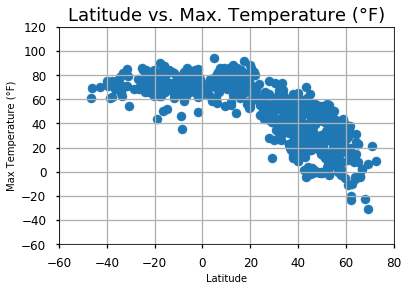

In [7]:
plt.scatter(city_samples["Lat"], city_samples["Max Temp(°F)"], marker="o")

plt.title('Latitude vs. Max. Temperature (°F)', fontsize = 18)
plt.ylabel('Max Temperature (°F)',  fontsize = 10)
plt.xlabel('Latitude', fontsize = 10)
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=12)
plt.savefig('latitude_temp')
plt.show()

# Latitude vs. Humidity (%)

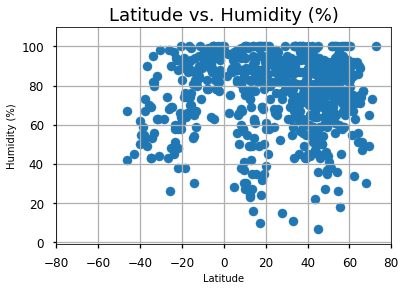

In [8]:
plt.scatter(city_samples["Lat"], city_samples["Humidity(%)"], marker="o")

plt.title('Latitude vs. Humidity (%)', fontsize = 18)
plt.ylabel('Humidity (%)',  fontsize = 10)
plt.xlabel('Latitude', fontsize = 10)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-1, 110)
plt.tick_params(labelsize=12)
plt.savefig('latitude_humidity')
plt.show()

# Latitude vs. Cloudiness (%)

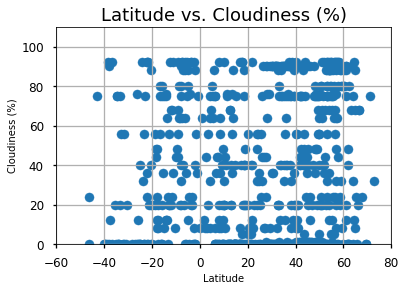

In [9]:
plt.scatter(city_samples["Lat"], city_samples["Cloudiness(%)"], marker="o")

plt.title('Latitude vs. Cloudiness (%)', fontsize = 18)
plt.ylabel('Cloudiness (%)',  fontsize = 10)
plt.xlabel('Latitude', fontsize = 10)
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 110)
plt.tick_params(labelsize=12)
plt.savefig('latitude_cloudiness')
plt.show()

# Latitude vs. Wind Speed (mph)

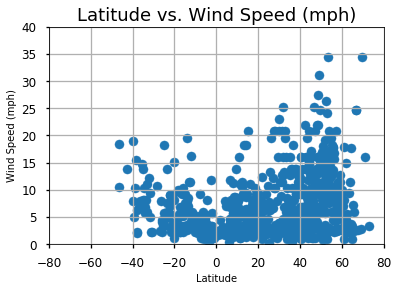

In [10]:
plt.scatter(city_samples["Lat"], city_samples["Wind Speed(mph)"], marker="o")

plt.title('Latitude vs. Wind Speed (mph)', fontsize = 18)
plt.ylabel('Wind Speed (mph)',  fontsize = 10)
plt.xlabel('Latitude', fontsize = 10)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(0, 40)
plt.tick_params(labelsize=12)
plt.savefig('latitude_windspeed')
plt.show()